In [43]:
import pandas as pd
import seaborn as sns

In [31]:
df = pd.read_csv('../data/iris.csv', header=0)

In [32]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [33]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [34]:
df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
86,6.7,3.1,4.7,1.5,Versicolor
130,7.4,2.8,6.1,1.9,Virginica
131,7.9,3.8,6.4,2.0,Virginica
111,6.4,2.7,5.3,1.9,Virginica
58,6.6,2.9,4.6,1.3,Versicolor


In [35]:
df.shape

(150, 5)

In [36]:
df.size

750

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
# dropping a column
# though the column `id` doesn't exist in this dataset, but often times we find ourselves
# removing columns that are not related or are labels.
# df = df.drop(['id'])

In [39]:
# if we take a look at data types in the data frame, we see that float64 is used to hold
# the values of sepal and petal lengths and widths. However, these values are small and don't 
# use all the 64 bits allocated to them, so we can allocate less memory to them by changing 
# their types to float 32.
for col in df.select_dtypes(include=['float64']):
    df[col] = df[col].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float32
 1   sepal.width   150 non-null    float32
 2   petal.length  150 non-null    float32
 3   petal.width   150 non-null    float32
 4   variety       150 non-null    object 
dtypes: float32(4), object(1)
memory usage: 3.6+ KB


previous dataframe with 64-bit floats:
```txt
memory usage: 6.0+ KB
```

current dataframe with 32-bit floats:
```txt
memory usage: 3.6+ KB
```

It is a good idea to use a dataset that uses lower memory to find the best hyperparameters, but we should use the original dataset to train the model itself.

In [40]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As we can see for `sepal.length`, mean and median (50%) are close to each other, and it seems that the dataset doesn't have significant skewness. 

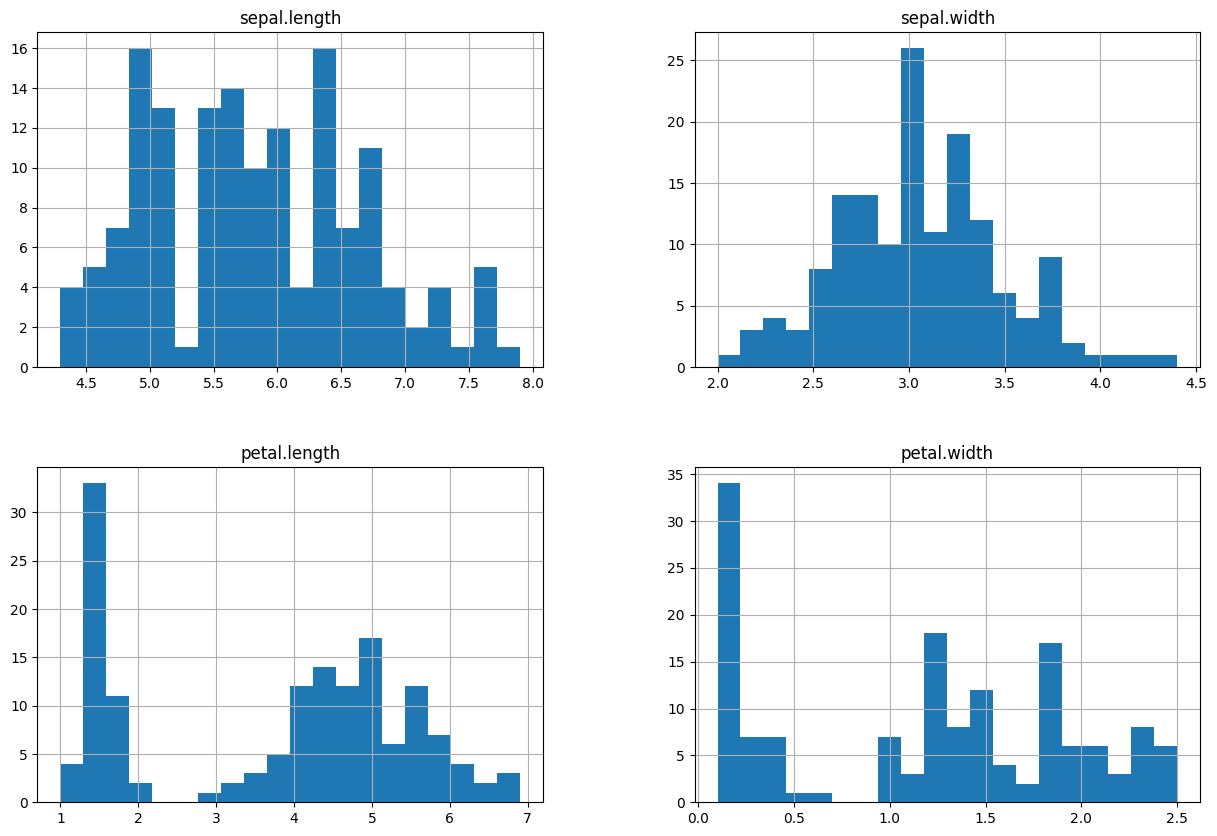

In [42]:
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
df[features].hist(bins=20, figsize=(15, 10));

Looking at `sepal.length`, it looks like that the data is skewed and doesn't have a normal distribution😅 

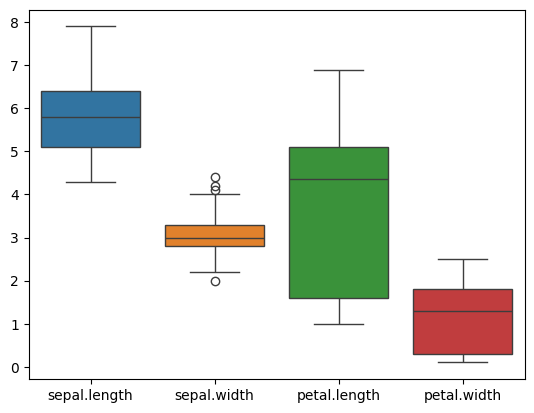

In [44]:
sns.boxplot(data=df[features]);

We can see that we have outliers in `sepal.width`.